
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [17]:

import numpy as np
import matplotlib.pyplot as plt


In [18]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

        self.std_[self.std_ == 0] = 1

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)



In [19]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b

            mse = np.mean((y - y_pred) ** 2)
            l2_term = self.l2_lambda * np.sum(self.w ** 2)
            loss = mse + l2_term
            self.losses.append(loss)
            dw = (-2 / n_samples) * np.dot(X.T, (y - y_pred)) \
                 + 2 * self.l2_lambda * self.w
            db = (-2 / n_samples) * np.sum(y - y_pred)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b



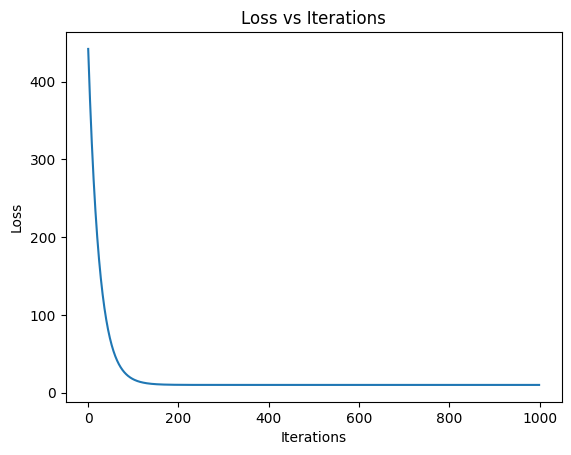

In [20]:
np.random.seed(42)

X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 5 + np.random.randn(100) * 2

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)
model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()


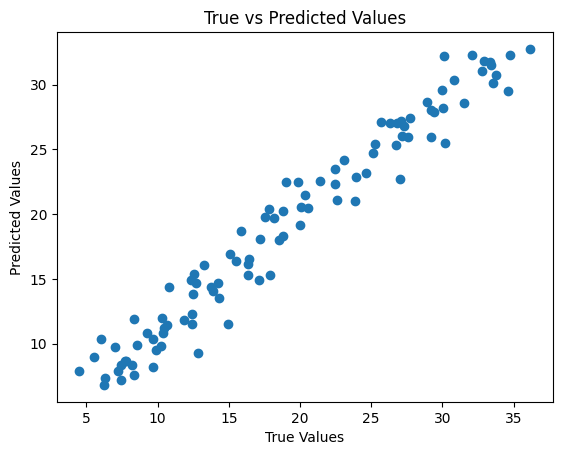

In [21]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [22]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [23]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            z = X @ self.w + self.b
            y_pred = sigmoid(z)

            loss = -np.mean(
                y * np.log(y_pred + 1e-9) +
                (1 - y) * np.log(1 - y_pred + 1e-9)
            ) + self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

            dw = (X.T @ (y_pred - y)) / n_samples + 2 * self.l2_lambda * self.w
            db = np.mean(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)



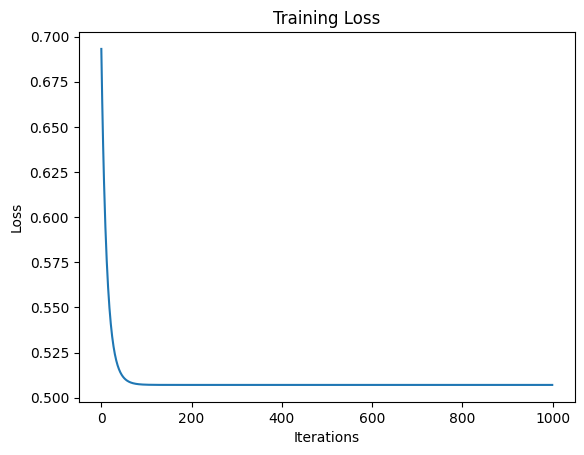

In [24]:
np.random.seed(0)

X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)
model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


In [25]:
y_pred = model.predict(X_scaled)
accuracy = np.mean(y_pred == y)
print("Training Accuracy:", accuracy)


Training Accuracy: 0.985



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [26]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
import numpy as np

def kmeans_matrix(M, k, max_iters=100):
    n, m = M.shape
    values = M.flatten()

    centroids = np.random.choice(values, k, replace=False)

    for _ in range(max_iters):
        distances = np.abs(values[:, None] - centroids[None, :])
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([
            values[labels == i].mean() if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids
    assignment_table = labels.reshape(n, m)

    cookbook = {i: [] for i in range(k)}
    for i in range(n):
        for j in range(m):
            cluster = assignment_table[i, j]
            cookbook[cluster].append((i, j))

    return assignment_table, cookbook, centroids



In [27]:
import numpy as np

M = np.array([
    [1, 2],
    [8, 9]
])

k = 2

assignment_table, cookbook, centroids = kmeans_matrix(M, k)

print("Input Matrix M:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)
print("\nCookbook:")
for c in cookbook:
    print(f"Cluster {c}:", cookbook[c])



Input Matrix M:
 [[1 2]
 [8 9]]

Assignment Table:
 [[0 0]
 [1 1]]

Centroids:
 [1.5 8.5]

Cookbook:
Cluster 0: [(0, 0), (0, 1)]
Cluster 1: [(1, 0), (1, 1)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
